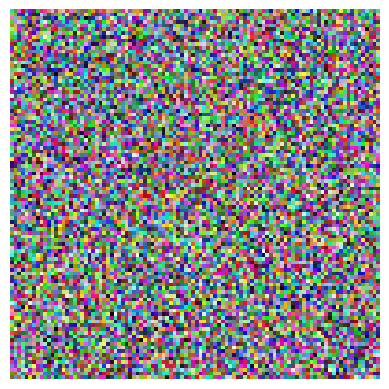

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torch
# 假设你有一个 numpy 数组
# 创建一个随机的 numpy 数组，形状为 (100, 100, 3)，表示 RGB 图像
numpy_array = np.random.rand(100, 100, 3) * 255  # 将值范围从 0 到 255

# 将 numpy 数组转换为 PIL 图像
pil_image = Image.fromarray(numpy_array.astype('uint8'))  # 确保数据类型为 uint8

# 显示图像
plt.imshow(pil_image)
plt.axis('off')  # 可选，去掉坐标轴
plt.show()


In [2]:
import torch

In [3]:
import torch
from colorization_unet import ColorizationUNet

model = ColorizationUNet()
# 创建一个示例灰度图像，尺寸为(1, 1, 160, 160)
input_image = torch.randn(1, 1, 160, 160)
# 前向传播
output_image = model(input_image)
print(output_image.shape)  # 输出尺寸应为(1, 3, 160, 160)


torch.Size([1, 3, 160, 160])


In [4]:
model.eval()

ColorizationUNet(
  (enc1): ConvBlock(
    (conv): Conv2d(1, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc2): ConvBlock(
    (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc3): ConvBlock(
    (conv): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc4): ConvBlock(
    (conv): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc5): ConvBlock(
    (conv): Conv2d(512, 512, kernel_size=(3, 3), stride

In [5]:

# 将模型移动到GPU（如果可用）
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

ColorizationUNet(
  (enc1): ConvBlock(
    (conv): Conv2d(1, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc2): ConvBlock(
    (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc3): ConvBlock(
    (conv): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc4): ConvBlock(
    (conv): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc5): ConvBlock(
    (conv): Conv2d(512, 512, kernel_size=(3, 3), stride

In [6]:
model.load_state_dict(torch.load('./checkpoints/colorization_epoch_50.pth', map_location=device, weights_only=True))

D:\mambaforge\envs\cuda121\lib\site-packages\torch\_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


<All keys matched successfully>

In [7]:
model.eval()

ColorizationUNet(
  (enc1): ConvBlock(
    (conv): Conv2d(1, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc2): ConvBlock(
    (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc3): ConvBlock(
    (conv): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc4): ConvBlock(
    (conv): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc5): ConvBlock(
    (conv): Conv2d(512, 512, kernel_size=(3, 3), stride

In [8]:
torch.__version__

'2.1.1'

In [9]:
import torchvision
# torchvision.

In [10]:
import torchvision.transforms as transforms

In [11]:
# 定义与训练时相同的变换
transform = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.ToTensor(),
])

In [12]:
import numpy as np
from PIL import Image

In [13]:
# 加载灰度图像并预处理
gray_image = Image.open('landscape/color/0.jpg').convert('L')
gray_tensor = transform(gray_image).unsqueeze(0).to(device)  # 添加批次维度并移动到设备

np.array(gray_image).shape

(150, 150)

In [14]:
# 使用模型进行预测
with torch.no_grad():
    output_color = model(gray_tensor)

# 将输出转换为图像并保存
output_color = output_color.squeeze(0).cpu().numpy()  # 移除批次维度并移动到 CPU
output_img = np.transpose(output_color, (1, 2, 0))  # 调整维度顺序为 [H, W, C]

In [15]:
import matplotlib.pyplot as plt

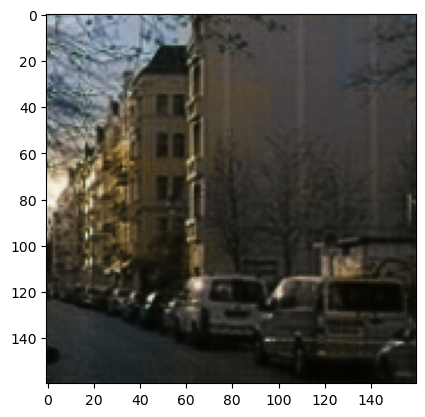

In [16]:
plt.imshow(output_img)